In [2]:
from collections.abc import Iterable

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def make_graph(nodes: Iterable, M: np.ndarray, G: nx.classes.digraph.DiGraph=nx.DiGraph()):
    """Build graph based on list of nodes and a weight matrix

    Args:
        nodes (list): Graph nodes
        M (np.ndarray): Weight matrix
        G (nx.classes.digraph.DiGraph, optional): Graph type. Defaults to nx.DiGraph().

    Returns:
        [type]: Graph object

    Example:
        >>> n_nodes = 4
        >>> M = np.random.rand(n_nodes, n_nodes)
        >>> nodes = range(M.shape[0])
        >>> G = make_graph(nodes, M)
    """

    for node in nodes:
        G.add_node(node, label=f"{node}")
        
    for i, origin_node in enumerate(nodes):
        for j, destination_node in enumerate(nodes):
            if M[i, j] != 0:
                G.add_edge(origin_node, destination_node, weight=M[i, j]
                            ,label=f"{M[i, j]:0.02f}")

    return G


def graphplot(G: nx.classes.digraph.DiGraph, M: np.ndarray
            ,min_weight_threshold: float=0.0, bins: int=4
            ,graph_layout: str="spring_layout"
            ,figsize: tuple=(20, 10)
            ,cmap=plt.cm.coolwarm
            ,edge_kwargs=None, node_label_kwargs=None, node_kwargs=None
            ):
    """Plot a graph with weights on edges

    Args:
        G (nx.classes.digraph.DiGraph): Weighted graph
        M (np.ndarray): Weight matrix
        min_weight_threshold (float, optional): Minimal weight to be plotted. Defaults to 0.0.
        bins (int, optional): Number of bins to divide the weights. Defaults to 4.
        graph_layout (str, optional): Defaults to "spring_layout".
        figsize (tuple, optional): Defaults to (20, 10).
        cmap ([type], optional): Matplotlib colormap. Defaults to plt.cm.coolwarm.
        edge_kwargs ([type], optional): Kwargs to edge plot. Defaults to None.

    Returns:
        ax: Plotted graph

    Example:
        >>> n_nodes = 4
        >>> M = np.random.rand(n_nodes, n_nodes)
        >>> nodes = range(M.shape[0])
        >>> G = make_graph(nodes, M)
        >>> graphplot(G, M)

    References:
        [1] https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html
    """
    node_kwargs = node_kwargs or {"node_color": "k", "node_size": 500}

    edge_kwargs = edge_kwargs or {"edge_color" :nx.get_edge_attributes(G, 'weight').values()
                    ,"edge_cmap": cmap
                    ,"width": 4
                    ,"connectionstyle":'arc3, rad=0.2'
                    }

    node_label_kwargs = node_label_kwargs or {"font_color": "w", "font_size": 16
                                    ,"font_weight": "bold"
                                    }

    pos = getattr(nx, graph_layout)(G)

    fig, ax = plt.subplots(figsize=figsize)
    nx.draw_networkx_nodes(G, pos, ax=ax, **node_kwargs)
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label')
                            ,ax=ax, **node_label_kwargs)
    edges = nx.draw_networkx_edges(G, pos, ax=ax, **edge_kwargs)

    # Configure colorbar
    _, bin_edges = np.histogram(
                    np.ma.masked_array(M, mask=M==min_weight_threshold).compressed()
                    ,bins=bins)

    pc = mpl.collections.PatchCollection(edges, cmap=cmap)
    cmap_array = list(bin_edges)
    pc.set_array(cmap_array)
    cbar = plt.colorbar(pc);
    cbar.set_label('weights', rotation=270, fontsize=16, labelpad=20)

    # ax = plt.gca()
    ax.set_axis_off()
    return ax


/tmp/ipykernel_528/1824978323.py:99: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(pc);


[[0.91753808 0.3683666  0.3096244  0.19456242]
 [0.41662811 0.88492788 0.85076841 0.40816722]
 [0.821422   0.25108361 0.25305956 0.88238645]
 [0.48321248 0.73035534 0.25434072 0.50384568]]


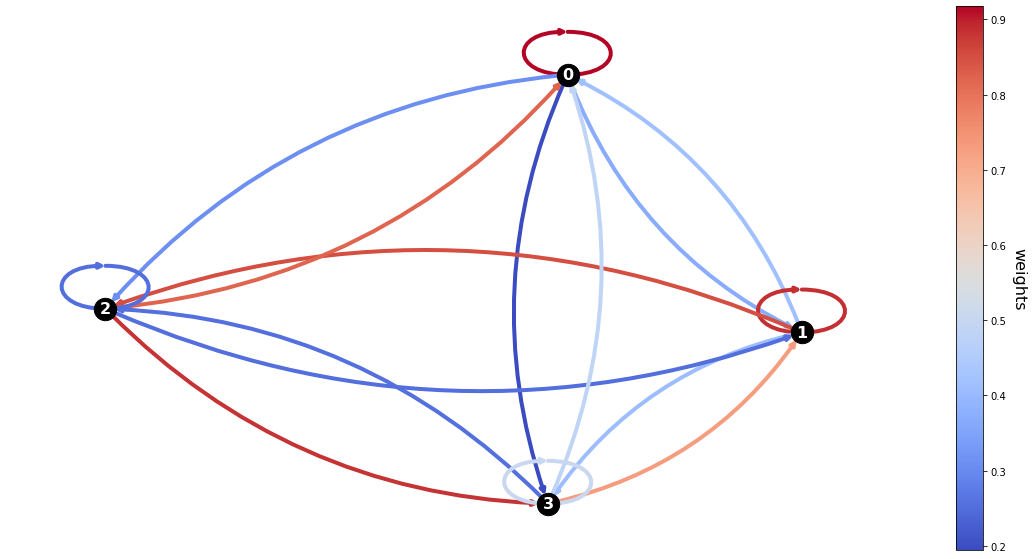

In [3]:
n_nodes = 4
M = np.random.rand(n_nodes, n_nodes)
nodes = range(M.shape[0])
G = make_graph(nodes, M)
ax = graphplot(G, M);
print(M)
plt.savefig("2021-09-03-blog-post_plotting_weighted_graph.png")